In [2]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
df = pd.read_csv('grouped_data.csv', index_col=0)
df.drop(['WasRainingDuringRaceAnyTime'], axis=1, inplace=True)
df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,lapTireChange
15,990,ALO,McLaren,13,7,6,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,"14: SOFT->MEDIUM, 39: MEDIUM->SUPERSOFT"
16,990,BOT,Mercedes,3,2,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,20: SUPERSOFT->MEDIUM
17,990,ERI,Sauber,17,9,8,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,23: SOFT->MEDIUM
18,990,GAS,Toro Rosso,5,4,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,"15: SUPERSOFT->SOFT, 34: SOFT->SUPERSOFT"
19,990,GRO,Haas F1 Team,16,13,3,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,"18: SUPERSOFT->SOFT, 30: SOFT->SUPERSOFT, 45: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,SAI,Ferrari,5,3,2,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,19: SOFT->HARD
1341,1073,STR,Aston Martin,13,13,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,"21: MEDIUM->HARD, 52: HARD->SOFT"
1342,1073,TSU,AlphaTauri,8,4,4,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,"23: MEDIUM->HARD, 53: HARD->SOFT"
1343,1073,VER,Red Bull,1,1,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,"13: SOFT->HARD, 36: HARD->HARD, 53: HARD->SOFT"


In [10]:
df[['driverCode', 'teamName', 'circuitName', 'raceName', 'lapTireChange']] = df[['driverCode', 'teamName', 'circuitName', 'raceName', 'lapTireChange']].apply(lambda col: pd.factorize(col)[0])
df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,lapTireChange
15,990,0,0,13,7,6,0,0,2018,28.0,46.4,33.5,1.5,0
16,990,1,1,3,2,1,0,0,2018,28.0,46.4,33.5,1.5,1
17,990,2,2,17,9,8,0,0,2018,28.0,46.4,33.5,1.5,2
18,990,3,3,5,4,1,0,0,2018,28.0,46.4,33.5,1.5,3
19,990,4,4,16,13,3,0,0,2018,28.0,46.4,33.5,1.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,12,8,5,3,2,17,17,2021,25.6,53.5,33.0,0.7,176
1341,1073,14,14,13,13,0,17,17,2021,25.6,53.5,33.0,0.7,696
1342,1073,30,12,8,4,4,17,17,2021,25.6,53.5,33.0,0.7,697
1343,1073,19,9,1,1,0,17,17,2021,25.6,53.5,33.0,0.7,698


In [11]:
df.describe()

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,lapTireChange
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1032.752764,13.812060,6.292462,10.007035,9.180905,0.826131,9.828141,11.753769,2019.610050,23.710050,51.223015,38.302915,1.398392,322.553769
std,23.224198,8.122543,4.046746,5.838276,5.107835,4.153121,7.081419,8.508055,1.074068,4.394781,14.518574,9.263006,0.979065,194.922778
min,990.000000,0.000000,0.000000,0.000000,1.000000,-18.000000,0.000000,0.000000,2018.000000,15.500000,16.900000,18.200000,0.000000,0.000000
25%,1014.000000,7.000000,3.000000,5.000000,5.000000,-1.000000,4.000000,4.000000,2019.000000,20.400000,40.000000,30.600000,0.600000,161.500000
50%,1031.000000,14.000000,7.000000,10.000000,9.000000,1.000000,9.000000,10.000000,2020.000000,23.700000,53.500000,38.500000,1.300000,294.000000
75%,1054.000000,20.000000,9.000000,15.000000,13.000000,3.000000,15.000000,17.000000,2021.000000,27.600000,60.200000,43.900000,2.100000,482.500000
max,1073.000000,31.000000,14.000000,20.000000,20.000000,17.000000,25.000000,30.000000,2021.000000,34.200000,95.500000,57.000000,5.300000,698.000000


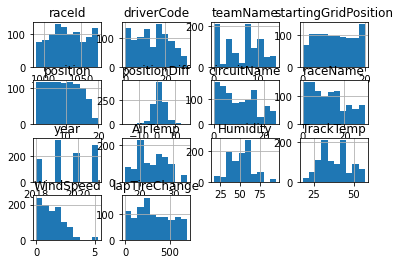

In [13]:
df.hist()
pyplot.show()

In [18]:
array = df.values
x = array[:,0:13]
y = array[:,13]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.20, random_state=1)

In [19]:
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')), ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()),
          ('SVM', SVC(gamma='auto'))]
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


LR: 0.028940 (0.012790)
LDA: 0.028972 (0.018815)
KNN: 0.038956 (0.013094)


c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


CART: 0.032658 (0.015054)


c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


NB: 0.032690 (0.017083)


c:\develop\studies\licencjat\venv\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


SVM: 0.012563 (0.000078)


In [27]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_validation)
predictions

array([  2., 435., 229., 642., 137., 639., 154., 299.,   2.,  46.,  78.,
       117.,  56., 113., 424.,   0.,  88.,   4., 205., 155., 500., 646.,
       565., 225., 155.,  97.,  94., 661., 432., 334., 176.,  78., 534.,
       329., 299., 225.,  57., 167., 351., 249., 159., 565.,  56.,  83.,
        82., 369., 577.,  37., 681., 354., 314.,  29., 435.,  35.,  80.,
       664., 154., 484., 231., 494., 154., 192., 480., 476., 577., 481.,
       354., 260., 247.,  18., 632., 568., 211., 664., 224.,  48., 165.,
       238.,  59., 478., 211., 156., 604., 662., 246., 226., 254., 424.,
       424., 476., 148., 148., 369., 681.,   2., 247.,   5., 534., 147.,
        70., 159.,   4., 424.,  86., 577., 681., 154., 369., 157., 242.,
       337., 565., 246.,  52., 238.,  94., 159., 327.,  99., 577., 148.,
       223.,   1., 165., 225., 424., 241., 242., 254., 601., 242., 211.,
         5.,   0., 597., 399., 568., 601., 249., 231.,  50.,  94., 154.,
       661.,  95., 662., 337., 627., 209.,  59., 11

In [26]:
print(accuracy_score(y_validation, predictions))

0.04522613065326633
